In [4]:


from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

import numpy as np


import seaborn as sns
sns.set_context("paper", font_scale=1.5)

import os


In [2]:
# Load model from pickle
with open("2dmodel60.pkl", 'rb') as f:
    mm = pickle.load(f)

In [3]:
original = mm.get_images()


In [ ]:
# Create 1000 PCA fits with random subsamples of the data
from tqdm import trange
from sklearn.decomposition import PCA

def boostrap():
    data = original.reshape(original.shape[0], -1).copy()
    pca = PCA(n_components = 60)
    explained_variance_ratio=[]
    for i in trange(400):
        random_samples = np.random.choice(data.shape[0], int(data.shape[0]*0.75), replace=False)
        subsample = data[random_samples]
        pca.fit(subsample)
        explained_variance_ratio.append(pca.explained_variance_ratio_)
    evr = np.array(explained_variance_ratio)
    np.save("explained_variance_ratios_60_comp.npy",evr)

In [7]:

evr = np.load("explained_variance_ratios_60_comp.npy")
evr3d = np.load("EVR_boostrap_3d_215_eigengalaxies.npy")

In [9]:
evr.shape

(400, 60)

2D
Mean: 0.9087
Median: 0.9087
Standard deviation: 0.0003
3D
Mean: 0.8902
Median: 0.8902
Standard deviation: 0.0003


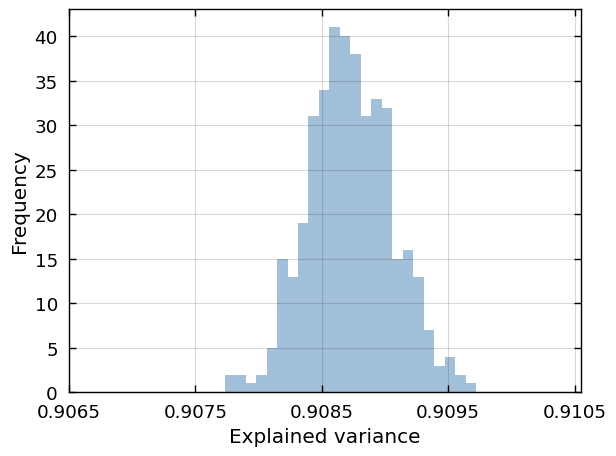

In [10]:
import matplotlib.pyplot as plt
import numpy as np

evr_sum = evr.sum(axis=1)
evr_sum3d = evr3d.sum(axis=1)
n_bins = 40

# Calculate statistics
mean = np.mean(evr_sum)
std = np.std(evr_sum)
median = np.median(evr_sum)

mean3d = np.mean(evr_sum3d)
std3d = np.std(evr_sum3d)
median3d = np.median(evr_sum3d)

print("2D")
print("Mean: {:.4f}".format(mean))
print("Median: {:.4f}".format(median))
print("Standard deviation: {:.4f}".format(std))

print("3D")
print("Mean: {:.4f}".format(mean3d))
print("Median: {:.4f}".format(median3d))
print("Standard deviation: {:.4f}".format(std3d))


tick_range = (mean - 5 * std, mean + 5 * std)
plt.hist(evr_sum, bins=n_bins, color="steelblue", alpha=0.5, range=tick_range)
plt.hist(evr_sum3d, bins=n_bins, color="maroon", alpha=0.5, range=tick_range)
plt.xlabel("Explained variance")
plt.ylabel("Frequency")
plt.grid()
plt.tick_params(bottom=True, top=True, left=True, right=True, direction='in', which='major', grid_color='black',
                grid_alpha=0.15, pad = 8)

# Adjust tick label font size
ticks, _ = plt.xticks()
plt.xticks(ticks[::2], ["{:.4f}".format(tick) for tick in ticks[::2]])

plt.tight_layout()

import os
os.makedirs("plots", exist_ok=True)
plt.savefig("plots/explained_variance_60_comp.pdf", dpi=300)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

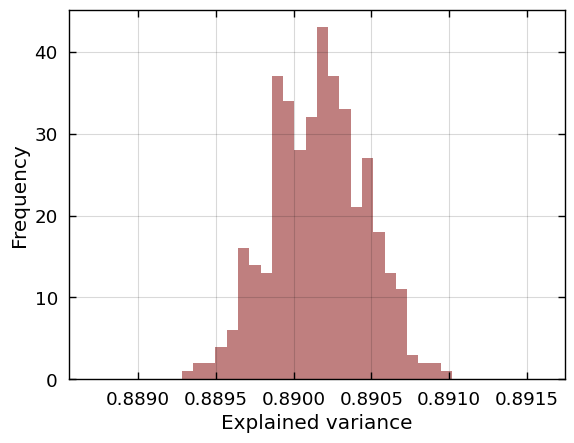

In [25]:
lower= mean3d - 5 * std3d
upper= mean3d + 5 * std3d

tick_range= (round(lower, 4), round(upper, 4))

plt.hist(evr_sum, bins=n_bins, color="steelblue", alpha=0.5, range=tick_range)
plt.hist(evr_sum3d, bins=n_bins, color="maroon", alpha=0.5, range=tick_range)
plt.xlabel("Explained variance")
plt.ylabel("Frequency")
plt.grid()
plt.tick_params(bottom=True, top=True, left=True, right=True, direction='in', which='major', grid_color='black',
                grid_alpha=0.15, pad = 8)

# Adjust tick label font size
#ticks, _ = plt.xticks()
#plt.xticks(ticks[::2], ["{:.4f}".format(tick) for tick in ticks[::2]])
#Adjust tick label font size

tickrange = np.linspace(tick_range, n_bins//2+1)
plt.xticks(tickrange,tickrange,rotation=45)
plt.tight_layout()

import os
os.makedirs("plots", exist_ok=True)
plt.savefig("plots/EVR_bootstrap3d", dpi=300)

In [18]:
["{:.4f}".format(tick) for tick in tickrange]

TypeError: unsupported format string passed to numpy.ndarray.__format__

In [21]:
"{:.4f}".format(tickrange[0])

TypeError: unsupported format string passed to numpy.ndarray.__format__

In [19]:
tickrange

array([[ 0.8887    ,  0.8916    ],
       [ 1.29913469,  1.30197551],
       [ 1.70956939,  1.71235102],
       [ 2.12000408,  2.12272653],
       [ 2.53043878,  2.53310204],
       [ 2.94087347,  2.94347755],
       [ 3.35130816,  3.35385306],
       [ 3.76174286,  3.76422857],
       [ 4.17217755,  4.17460408],
       [ 4.58261224,  4.58497959],
       [ 4.99304694,  4.9953551 ],
       [ 5.40348163,  5.40573061],
       [ 5.81391633,  5.81610612],
       [ 6.22435102,  6.22648163],
       [ 6.63478571,  6.63685714],
       [ 7.04522041,  7.04723265],
       [ 7.4556551 ,  7.45760816],
       [ 7.8660898 ,  7.86798367],
       [ 8.27652449,  8.27835918],
       [ 8.68695918,  8.68873469],
       [ 9.09739388,  9.0991102 ],
       [ 9.50782857,  9.50948571],
       [ 9.91826327,  9.91986122],
       [10.32869796, 10.33023673],
       [10.73913265, 10.74061224],
       [11.14956735, 11.15098776],
       [11.56000204, 11.56136327],
       [11.97043673, 11.97173878],
       [12.38087143,